In [1]:
import matplotlib.pyplot as plt
import pystac_client

from mccn._types import FilterConfig
from mccn.extent import GeoBoxBuilder
from mccn.client import MCCN
from mccn.loader.vector import VectorLoader, VectorLoadConfig

ENDPOINT = "http://203.101.230.81:8082"
client = pystac_client.Client.open(ENDPOINT)

In [2]:
engine = MCCN(ENDPOINT, collection_id="attribute", shape=100)

In [7]:
ds = engine.load_vector()
ds

<xarray.Dataset> Size: 242kB
Dimensions:      (time: 1, y: 100, x: 100)
Coordinates:
  * y            (y) float64 800B -37.48 -37.49 -37.49 ... -37.99 -38.0 -38.0
  * x            (x) float64 800B 144.5 144.5 144.5 144.5 ... 144.9 144.9 144.9
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2024-12-31T14:20:00
Data variables:
    SA2_NAME21   (time, y, x) int64 80kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    AREASQKM21   (time, y, x) float64 80kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    __MASK__     (time, y, x) int64 80kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
Attributes:
    __MASK__:    {'1': 'SA2_Werribee', '2': 'SA2_Sunbury'}
    SA2_NAME21:  {1: 'Werribee - South', 2: 'Werribee - East', 3: 'Werribee -...

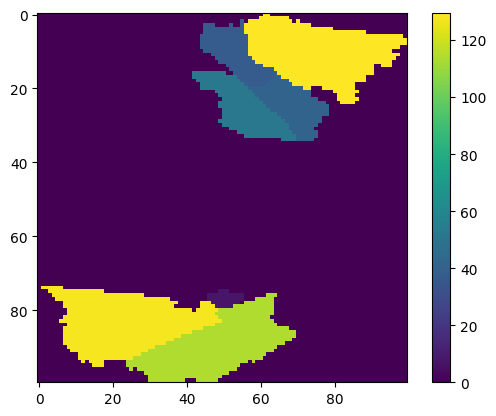

In [11]:
plt.imshow(ds.AREASQKM21.values[0,:,:])
plt.colorbar() 
plt.show()

### Attributes only

In [ ]:
attr_collection = client.get_collection("attribute")
items = [parse_item(item) for item in attr_collection.get_items(recursive=True)]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

attr_loader = VectorLoader(
    pitems,
    filter_config=FilterConfig(GeoBoxBuilder.from_collection(attr_collection, 100)),
)
attr_ds = attr_loader.load()
attr_ds

In [ ]:
plt.imshow(attr_ds.AREASQKM21.values[0, :, :])
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(attr_ds.SA2_NAME21.values[0, :, :])
plt.colorbar()
plt.show()

### Mask only

In [ ]:
mask_collection = client.get_collection("mask")
items = [parse_item(item) for item in mask_collection.get_items(recursive=True)]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

mask_loader = VectorLoader(
    pitems,
    filter_config=FilterConfig(GeoBoxBuilder.from_collection(mask_collection, 100)),
    load_config=VectorLoadConfig(groupby="field"),
)
mask_ds = mask_loader.load()
mask_ds

In [ ]:
plt.imshow(mask_ds.MASKS.values[0, :, :])
plt.show()

### Mask + Attribute

In [ ]:
mask_attribute_collection = client.get_collection("mask_attribute")
items = [
    parse_item(item) for item in mask_attribute_collection.get_items(recursive=True)
]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

mask_attribute_loader = VectorLoader(
    pitems,
    filter_config=FilterConfig(
        GeoBoxBuilder.from_collection(mask_attribute_collection, 100)
    ),
    load_config=VectorLoadConfig(groupby="field"),
)
mask_attribute_ds = mask_attribute_loader.load()
mask_attribute_ds

In [ ]:
plt.imshow(mask_attribute_ds.MASKS.values[0, :, :])
plt.show()

In [ ]:
plt.imshow(mask_attribute_ds.SA2_NAME21.values[0, :, :])
plt.show()

### Join

In [ ]:
join_collection = client.get_collection("join")
items = [parse_item(item) for item in join_collection.get_items(recursive=True)]
pitems = []
bands = None
for item in items:
    pitem = band_filter(item, bands)
    if pitem:
        pitems.append(pitem)

join_loader = VectorLoader(
    pitems,
    filter_config=FilterConfig(GeoBoxBuilder.from_collection(join_collection, 100)),
)
join_ds = join_loader.load()
join_ds

In [ ]:
plt.imshow(join_ds.Sell_Price.values[3, :, :])
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(join_ds.Area.values[0, :, :])
plt.colorbar()
plt.show()

In [ ]:
import bisect

In [ ]:
mydict = {1: 2, 3: 5, 5: -1}

# Sort by key
sorted(mydict.items(), key=lambda item: item[0])

In [ ]:
class Node:
    def __init__(self, k, v):
        self.k = k
        self.v = v

    def __gt__(self, other):
        if (self.k > other.k) or (self.k == other.k and self.v < other.v):
            return True
        return False

    def __repr__(self):
        return f"({self.k}, {self.v})"

In [ ]:
myList = [Node(1, 2), Node(1, 1), Node(-5, 5), Node(4, 5), Node(7, 1)]
sList = sorted(myList)
myNode = Node(2, 2)
bisect.bisect_left(sList, myNode)